# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [2]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [3]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [4]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [11]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [13]:
print(movies.shape[0])

244914


### List all Batman movies ever made

In [14]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [15]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [20]:
print(movies[movies['title'].str.contains('Harry Potter',case=False)].sort_values('year',ascending=False))

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [21]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [22]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [28]:
movies[(movies['year']>=2000) & (movies['year']<=2018)].shape[0]

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [30]:
print(movies[movies['title']=='Hamlet'].shape[0])

20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [34]:
movies[(movies['year']>=2000) & (movies['title']=='Hamlet')].sort_values('year')

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [61]:
#n is the only column with nan, let's drop it
castClean=cast.dropna()
#Movies titled Inception count, with and without nan
a=cast[cast['title']=='Inception'].shape[0] 
aClean=castClean[castClean['title']=='Inception'].shape[0] 
print('Asnwer is',a-aClean)

Asnwer is 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [65]:
print('Asnwer is',aClean)

Asnwer is 51


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [68]:
castClean[castClean['title']=='Inception'].sort_values('n',ascending=False).head(10)

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [75]:
#A
print(cast[cast['character']=='Albus Dumbledore'])

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

Index(['Dane Farwell', 'George (X) O'Connor', 'Michael Gambon',
       'Richard Harris', 'Timothy Tedmanson'],
      dtype='object', name='name')

In [93]:
#B
cast[cast['character']=='Albus Dumbledore'].groupby('name').count().index

Index(['Dane Farwell', 'George (X) O'Connor', 'Michael Gambon',
       'Richard Harris', 'Timothy Tedmanson'],
      dtype='object', name='name')

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [91]:
#A
print(len(cast[cast['name']=='Keanu Reeves'].groupby('character')))

56


,title,year,name,type,character,n
1892378,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0


In [92]:
#B
cast[(cast['name']=='Keanu Reeves') & (cast['n']==1.0) &(cast['year'] >= 1999)].sort_values('year',ascending=False)

,title,year,name,type,character,n
1892378,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [97]:
len(cast[(cast['year']<=1960) &(cast['year'] >= 1950)].groupby('character'))

139020

In [99]:
len(cast[(cast['year']<=2017) &(cast['year'] >= 2007)].groupby('character'))

619945

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [101]:
len(cast[(cast['n']==1.0) &(cast['year'] >= 2000)].groupby('character'))

38919

In [103]:
len(castClean[(castClean['n']>1.0) &(castClean['year'] >= 2000)].groupby('character'))

473347

In [112]:
#C
len(cast[(pd.isnull(cast.loc[:,'n'])) &(cast['year'] >= 2000)].groupby('character'))

382872

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [113]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

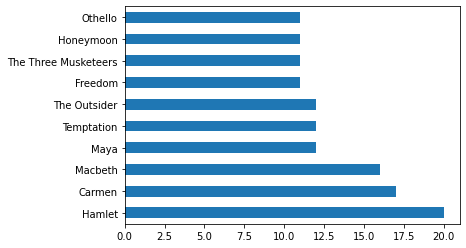

In [114]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [134]:
movies[movies['year']>=2000].groupby(by='year').count().sort_values(('title'),ascending=False)[:3]

,title
year,
2017,11474
2016,9440
2015,8702


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

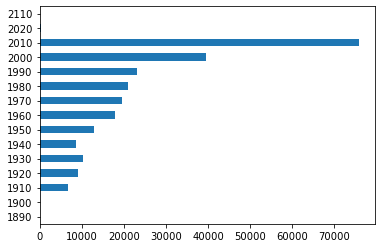

In [23]:
movies['decade']=movies['year'].apply(lambda x: int(x/10.0)*10)
d=movies.decade.value_counts().sort_index()
d.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [32]:
cast.groupby('character').size().sort_values(ascending=False)[:10]

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
dtype: int64

In [34]:
cast[(cast['character']=='Herself') & (cast["type"]=='actress')].groupby('name').size().sort_values(ascending=False)[:10]

name
Queen Elizabeth II           12
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Joyce Brothers                9
Margaret Thatcher             8
Hillary Clinton               8
Oprah Winfrey                 6
Mar?a Isabel (III) Mart?n     6
Sumie Sakai                   6
Joan Rivers                   6
dtype: int64

In [33]:
cast[(cast['character']=='Himself') & (cast["type"]=='actor')].groupby('name').size().sort_values(ascending=False)[:10]

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [39]:
cast[cast['character'].str.startswith('Zombie')].groupby('character').size().sort_values(ascending=False)[:10]

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
dtype: int64

In [40]:
cast[cast['character'].str.startswith('Police')].groupby('character').size().sort_values(ascending=False)[:10]

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:ylabel='year'>

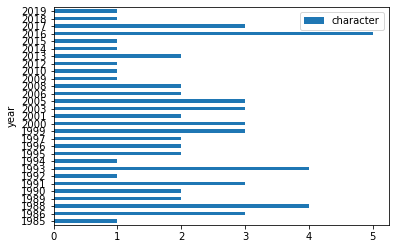

In [54]:
cast[cast['name']=='Keanu Reeves'].groupby(by=['year']).agg({'character':'count'}).plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [57]:
cast[cast['name']=='Keanu Reeves'].groupby(by=['year','n']).size()

year  n   
1985  1.0     1
1986  2.0     1
      3.0     1
      12.0    1
1988  1.0     1
      2.0     1
      5.0     1
      6.0     1
1989  1.0     1
      8.0     1
1990  2.0     1
      6.0     1
1991  1.0     1
      2.0     2
1992  4.0     1
1993  1.0     1
      5.0     1
      13.0    1
1994  1.0     1
1995  1.0     2
1996  1.0     2
1997  1.0     1
      2.0     1
1999  1.0     1
      42.0    2
2000  1.0     1
      3.0     2
2001  1.0     2
2003  3.0     1
      33.0    1
      59.0    1
2005  1.0     1
      17.0    1
      21.0    1
2006  1.0     1
      4.0     1
2008  1.0     2
2009  16.0    1
2010  1.0     1
2013  1.0     1
      2.0     1
2014  1.0     1
2015  1.0     1
2016  1.0     1
      4.0     1
      8.0     2
      25.0    1
2017  1.0     1
      11.0    1
2018  1.0     1
dtype: int64

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:xlabel='decade'>

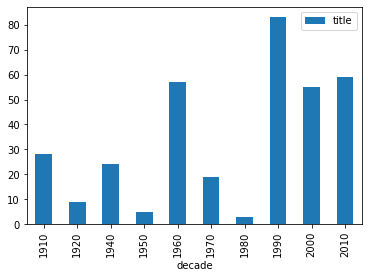

In [71]:
cast['decade']=cast['year'].apply(lambda x: int(x/10.0)*10)
cast[cast['title']=='Hamlet'].groupby('decade').agg('count').plot(kind='bar',y='title')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [86]:
len(cast[(cast['decade']==1960) & (cast['n']==1.0)].character.unique())

9908

In [87]:
len(cast[(cast['decade']==2000) & (cast['n']==1.0)].character.unique())

19154

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [111]:
temp1=cast[(cast['name']=='Frank Oz')].groupby(['year','title']).agg({'character':'count'})
temp1[temp1['character']>1]

character
year title                                          
1979 The Muppet Movie                              8
1981 An American Werewolf in London                2
     The Great Muppet Caper                        6
1982 The Dark Crystal                              2
1984 The Muppets Take Manhattan                    7
1985 Follow That Bird                              3
1992 The Muppet Christmas Carol                    7
1996 Muppet Treasure Island                        4
1999 Muppets from Space                            4
     The Adventures of Elmo in Grouchland          3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [117]:
temp2=cast[(cast['name']=='Frank Oz')].groupby('character').count()
temp2[temp2['title']>1].title

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: title, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

                                           title  year country       date
1237                    12 Dog Days of Christmas  2014     USA 2014-11-28
1238    12 Dogs of Christmas: Great Puppy Rescue  2012     USA 2012-10-09
2653        2016 Dancing Dolls a Christmas Story  2017     USA 2017-01-15
6183                        A Bad Moms Christmas  2017     USA 2017-11-01
6286                       A Belle for Christmas  2014     USA 2014-11-04
...                                          ...   ...     ...        ...
418628     The Shootin' It Christmas Spectacular  2013     USA 2013-12-20
432835                            This Christmas  2007     USA 2007-11-21
463173              What She Wants for Christmas  2012     USA 2012-12-01
465022                           White Christmas  1954     USA 1954-10-14
474305                 You Can't Fight Christmas  2017     USA 2017-11-01

[137 rows x 4 columns]


<AxesSubplot:>

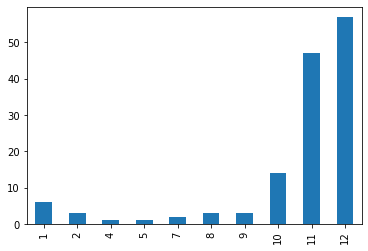

In [120]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
print(christmas)
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

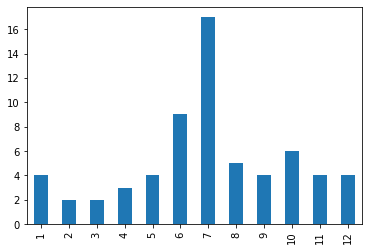

In [122]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

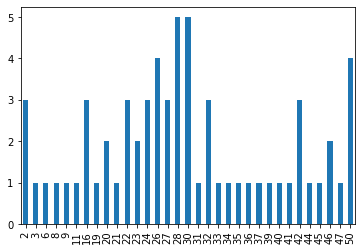

In [124]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
summer.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [129]:
merged=cast.merge(release_dates,on='title')
merged['year']=merged['year_x']
merged.drop(columns=['year_x','year_y'],inplace=True)

In [131]:
merged[(merged['name']=="Keanu Reeves") & (merged['n']==1) & (merged['country']=="USA")].sort_values('date')

,title,name,type,character,n,decade,country,date,year
11159047,Speed,Keanu Reeves,actor,Jack Traven,1.0,1990,USA,1922-10-22,1994
11159049,Speed,Keanu Reeves,actor,Jack Traven,1.0,1990,USA,1936-05-08,1994
8505570,Sweet November,Keanu Reeves,actor,Nelson Moss,1.0,2000,USA,1968-02-08,2001
21030349,The Night Before,Keanu Reeves,actor,Winston Connelly,1.0,1980,USA,1988-04-15,1988
11560862,Bill & Ted's Excellent Adventure,Keanu Reeves,actor,Ted,1.0,1980,USA,1989-02-17,1989
3957308,Bill & Ted's Bogus Journey,Keanu Reeves,actor,Ted,1.0,1990,USA,1991-07-19,1991
13820799,Little Buddha,Keanu Reeves,actor,Siddhartha,1.0,1990,USA,1994-05-25,1993
11159052,Speed,Keanu Reeves,actor,Jack Traven,1.0,1990,USA,1994-06-10,1994
2635357,Johnny Mnemonic,Keanu Reeves,actor,Johnny Mnemonic,1.0,1990,USA,1995-05-26,1995
14111937,A Walk in the Clouds,Keanu Reeves,actor,Paul Sutton,1.0,1990,USA,1995-08-11,1995


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

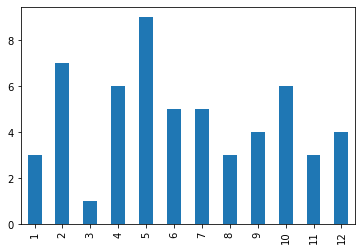

In [132]:
merged[(merged['name']=="Keanu Reeves") & (merged['country']=="USA")].date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

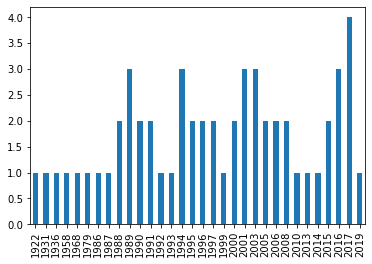

In [133]:
merged[(merged['name']=="Keanu Reeves") & (merged['country']=="USA")].date.dt.year.value_counts().sort_index().plot(kind='bar')